# Who are the high-frequency traders ?

First, import librairies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [2]:
#Metric
from sklearn import metrics


def micro_average_f1_score(dataframe_y_true, dataframe_y_pred):
    """
    Args
        dataframe_y_true: Pandas Dataframe
            Dataframe containing the true values of y.
            This dataframe was obtained by reading a csv file with following instruction:
            dataframe_y_true = pd.read_csv(CSV_1_FILE_PATH, index_col=0, sep=',')

        dataframe_y_pred: Pandas Dataframe
            This dataframe was obtained by reading a csv file with following instruction:
            dataframe_y_pred = pd.read_csv(CSV_2_FILE_PATH, index_col=0, sep=',')

    Returns
        score: Float
            The metric evaluated with the two dataframes. This must not be NaN.
    """

    score = metrics.f1_score(dataframe_y_true["type"], dataframe_y_pred["type"], average = "micro")

    return score

'''
if __name__ == '__main__':
    import pandas as pd
    CSV_FILE_Y_TRUE = '--------.csv'
    CSV_FILE_Y_PRED = '--------.csv'
    df_y_true = pd.read_csv(CSV_FILE_Y_TRUE, index_col=0, sep=',')
    df_y_pred = pd.read_csv(CSV_FILE_Y_PRED, index_col=0, sep=',')
    print(micro_average_f1_score(df_y_true, df_y_pred))
    '''

"\nif __name__ == '__main__':\n    import pandas as pd\n    CSV_FILE_Y_TRUE = '--------.csv'\n    CSV_FILE_Y_PRED = '--------.csv'\n    df_y_true = pd.read_csv(CSV_FILE_Y_TRUE, index_col=0, sep=',')\n    df_y_pred = pd.read_csv(CSV_FILE_Y_PRED, index_col=0, sep=',')\n    print(micro_average_f1_score(df_y_true, df_y_pred))\n    "

## Process the data

### Load the data

In this part we have a look at data and process them to be in the right form for the learning part.

In [3]:
x_train = pd.read_csv("data/AMF_train_X_XCZw8r3.csv", index_col=0, sep=',')
y_train = pd.read_csv("data/AMF_train_Y_omYQJZL.csv", index_col=0, sep=',')

In [4]:
nrows = len(x_train)
x_train

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105778,Isin_84,Date_27,Trader_60,1.150000,23.000000,NaN,0.0,736.500080,0.000000,0.000188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105779,Isin_102,Date_18,Trader_60,1.352941,23.000000,NaN,0.0,63.672695,0.000000,0.000963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105780,Isin_12,Date_13,Trader_60,1.146667,86.000000,NaN,0.0,708.440816,0.000000,0.000578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [5]:
y_train

,type
Trader,
Trader_285,MIX
Trader_114,NON HFT
Trader_110,NON HFT
Trader_57,NON HFT
Trader_128,NON HFT
...,...
Trader_140,MIX
Trader_451,MIX
Trader_438,MIX


### Form the data

First, we merge the two tables to obtain label on each of the x_train row.

In [6]:
data_train = pd.merge(x_train, y_train, how = 'left', on=["Trader"])
data_train.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


We drop the column trader, which is irrelevant for our task. We also cast columns share, day and type to int.

In [7]:
#replace the type 'HFT', 'MIX', and 'NON HFT' with labels 2, 1, 0
'''data_train['type'] = np.where((data_train['type']=='HFT'), 2, data_train['type'])
data_train['type'] = np.where((data_train['type']=='MIX'), 1, 0)'''
'''data_train['type' == 'HFT'] = 2
data_train['type' == 'MIX'] = 1
data_train['type' == 'NON HFT'] = 0'''
y_train_np = data_train[['type', 'Trader']]

In [8]:
'''# drop the column trader
data_train_ok = data_train.copy()
data_train_ok.pop("Trader")'''

# transform isin into int
data_train['Share'] = data_train['Share'].str[5:].astype(int)

# transform day into int
data_train['Day'] = data_train['Day'].str[5:].astype(int)

data_train.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,8,24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,87,29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,87,23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,12,11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,87,9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


### Handle NaN values

First, we have a look at NaN values in the dataframe.

In [9]:
#data_train_ok.dropna()

Unfortunately, there are many rows with NaN values. We loose too muc information if we just remove these rows.

Let's have a look at the columns containing NaNs.

In [10]:
# Number of rows with nan values for each column
columns_with_nan = []
for c in x_train.columns:
    if  nrows - len(x_train[c].dropna()) > 0:
        print(c, ' :', nrows - len(x_train[c].dropna()))
        columns_with_nan.append(c)
print(columns_with_nan)

OTR  : 1683
OMR  : 47612
min_dt_TV1  : 4235
mean_dt_TV1  : 4235
med_dt_TV1  : 4235
min_dt_TV1_TV2  : 25176
mean_dt_TV1_TV2  : 25176
med_dt_TV1_TV2  : 25176
min_dt_TV1_TV3  : 25255
mean_dt_TV1_TV3  : 25255
med_dt_TV1_TV3  : 25255
min_dt_TV1_TV4  : 25148
mean_dt_TV1_TV4  : 25148
med_dt_TV1_TV4  : 25148
['OTR', 'OMR', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1', 'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3', 'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4', 'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']


For each of the above columns, we have to decide if the rows with NaN values can be removed without loss of information.

In [11]:
l = columns_with_nan+['type']
df_nan = data_train[l]
df_nan.head()

,OTR,OMR,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,type
0,2.272727,12.500000,351.702399,9639.216031,1585.079495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NON HFT
1,1.696629,21.571429,0.000066,493.559196,0.000901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NON HFT
2,1.482759,118.250000,0.000018,163.954785,0.000770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NON HFT
3,1.705882,29.000000,0.000148,1232.562133,0.004301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NON HFT
4,1.517730,NaN,0.000025,248.073927,0.001364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NON HFT


In [12]:
for c in columns_with_nan:
    df_nan[c] = np.where((df_nan[c].isnull()), 0, 1)
df_nan.head()

<ipython-input-12-bc4a07afaa00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan[c] = np.where((df_nan[c].isnull()), 0, 1)


,OTR,OMR,min_dt_TV1,mean_dt_TV1,med_dt_TV1,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,type
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,NON HFT
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,NON HFT
2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,NON HFT
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,NON HFT
4,1,0,1,1,1,0,0,0,0,0,0,0,0,0,NON HFT


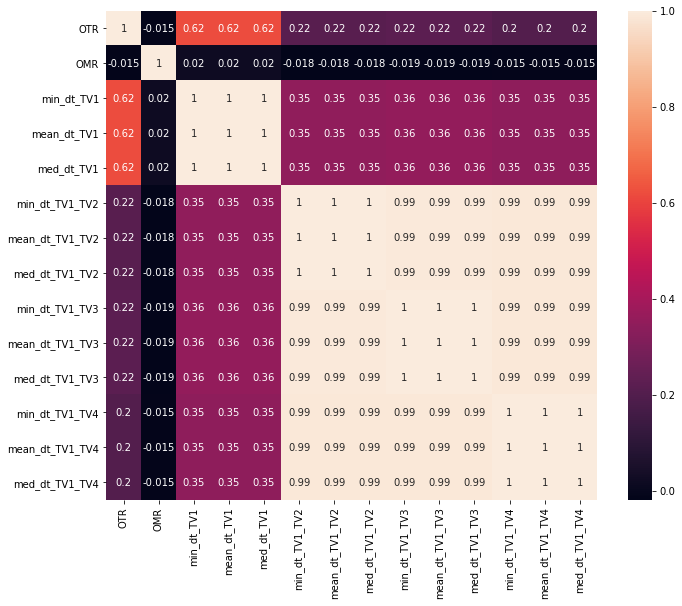

In [13]:
corrMatrix = df_nan.corr()

f, ax = plt.subplots(figsize=(11, 9))

sn.heatmap(corrMatrix, annot=True)
plt.show()

We try to replace the NaN values by the mean of the considered column.

In [14]:
data_train_na = data_train.fillna(data_train.mean())
print(data_train_na.head())

   Share  Day     Trader       OTR        OCR         OMR  \
0      8   24  Trader_10  2.272727   8.333333   12.500000   
1     87   29  Trader_10  1.696629  25.166667   21.571429   
2     87   23  Trader_10  1.482759  47.300000  118.250000   
3     12   11  Trader_10  1.705882  14.500000   29.000000   
4     87    9  Trader_10  1.517730  26.750000  164.469153   

   min_time_two_events  mean_time_two_events  10_p_time_two_events  \
0                  0.0           5117.830300              0.000000   
1                  0.0           1846.968401              0.000074   
2                  0.0            686.300630              0.000071   
3                  0.0           2174.335265              0.000000   
4                  0.0            944.008551              0.000071   

   med_time_two_events  ...  mean_dt_TV1_TV2  med_dt_TV1_TV2  min_dt_TV1_TV3  \
0           419.688500  ...        598.63774      389.411017      310.498829   
1             0.003374  ...        598.63774      38

## Train

In [15]:
'''x_train_ok = x_train.copy()
# drop the column trader
x_train_ok.pop("Trader")

# transform isin into int
x_train_ok['Share'] = x_train_ok['Share'].str[5:].astype(int)

# transform day into int
x_train_ok['Day'] = x_train_ok['Day'].str[5:].astype(int)

x_train_ok.head()
x_train_ok = x_train_ok.dropna()'''

'x_train_ok = x_train.copy()\n# drop the column trader\nx_train_ok.pop("Trader")\n\n# transform isin into int\nx_train_ok[\'Share\'] = x_train_ok[\'Share\'].str[5:].astype(int)\n\n# transform day into int\nx_train_ok[\'Day\'] = x_train_ok[\'Day\'].str[5:].astype(int)\n\nx_train_ok.head()\nx_train_ok = x_train_ok.dropna()'

In [16]:
x_train_na = data_train_na.copy()
x_train_na.pop('Trader')
x_train_na.pop('type')

0         NON HFT
1         NON HFT
2         NON HFT
3         NON HFT
4         NON HFT
           ...   
105777    NON HFT
105778    NON HFT
105779    NON HFT
105780    NON HFT
105781    NON HFT
Name: type, Length: 105782, dtype: object

In [17]:
print(x_train_na.head())

   Share  Day       OTR        OCR         OMR  min_time_two_events  \
0      8   24  2.272727   8.333333   12.500000                  0.0   
1     87   29  1.696629  25.166667   21.571429                  0.0   
2     87   23  1.482759  47.300000  118.250000                  0.0   
3     12   11  1.705882  14.500000   29.000000                  0.0   
4     87    9  1.517730  26.750000  164.469153                  0.0   

   mean_time_two_events  10_p_time_two_events  med_time_two_events  \
0           5117.830300              0.000000           419.688500   
1           1846.968401              0.000074             0.003374   
2            686.300630              0.000071             0.000599   
3           2174.335265              0.000000             6.152666   
4            944.008551              0.000071             0.001364   

   25_p_time_two_events  ...  min_dt_TV1_TV2  mean_dt_TV1_TV2  med_dt_TV1_TV2  \
0             10.722543  ...      297.616104        598.63774      389.

In [18]:
#Work on y_train
y_train = data_train_na[['Trader', 'type']]
for i in range(len(y_train)):
    if y_train['type'][i]=='HFT':
        y_train['type'][i]=2
    elif y_train['type'][i]=="MIX":
        y_train['type'][i]=1
    else:
        y_train['type'][i]=0
'''y_train['type'] = np.where((y_train['type']=='HFT'), 2, y_train['type'])
y_train['type'] = np.where((y_train['type']=='MIX'), 1, 0)'''
y_train = y_train[['type']]
a=0
b=0
c=0

for i in range(len(y_train)):
    if y_train['type'][i]==0:
        a += 1
    elif y_train['type'][i]==1:
        b += 1
    else :
        c += 1
print(a)
print(b)
print(c)

C:\Users\thea-\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


22349
51483
31950


Now, we have to split the data in a training set and a testing set.

In [19]:
#Splitting the data
X_train_ok, X_test_ok, y_train_ok, y_test_ok = train_test_split(x_train_na, y_train, test_size=0.15)
print(X_train_ok)

        Share  Day         OTR         OCR         OMR  min_time_two_events  \
2598        4    8    2.250000    8.000000  164.469153             0.000041   
60191      11   26   19.000000   19.000000  164.469153         16557.266000   
61819     103   18    4.370968   30.111111  164.469153             0.000000   
104555     86   10   14.195312    7.752533    1.607787             0.000000   
89669      24    8   11.040816  180.333333  164.469153             0.000000   
...       ...  ...         ...         ...         ...                  ...   
86366      91   13    1.680000    5.250000  164.469153             0.000000   
95024     117   27    5.559454    3.715961    8.577444             0.000000   
100276     65   13  299.375000    3.262943    2.626096             0.000180   
14600      99   28   14.928571    2.488095  164.469153             0.000000   
83666      55   12  365.930233    2.010349  164.469153             0.000000   

        mean_time_two_events  10_p_time_two_events 

In [20]:
#We can try to build a neural network (here, few layers + relu activation function, this can be changed to improve the results)
# Model definition

class Model (nn.Module):
  def __init__ (self, input_dim):
    super (Model, self).__init__()
    self.layer1 = nn.Linear (input_dim, input_dim)
    self.layer2 = nn.Linear (input_dim, input_dim)
    self.layer3 = nn.Linear (input_dim, input_dim)
    self.layer4 = nn.Linear (input_dim, 3) #3 classes so 3 outputs for the last layer

  def forward (self, x):
    x = nn.functional.relu (self.layer1(x))
    x = nn.functional.relu (self.layer2(x))
    x = nn.functional.relu (self.layer3(x))
    x = self.layer4(x)
    m = nn.Softmax(dim=1)
    output = m(x)
    return output

In [21]:
'''x_train_torch = torch.Tensor(x_train_ok.values)
data_train_na = data_train.dropna()
y_train_na = data_train_na[['type', 'Trader']]
y_train_na['type'] = np.where((y_train_na['type']=='HFT'), 2, y_train_na['type'])
y_train_na['type'] = np.where((y_train_na['type']=='MIX'), 1, 0)
y_train_np = y_train_na.pop('type')
y_train_np = y_train_np.to_numpy().reshape (-1,1)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(x_train_torch, y_train_np, test_size=0.15)
scaler = StandardScaler()
scaler.fit(X_train_rf)
X_train_rf = scaler.transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)'''
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_ok)
X_train_ok = scaler.transform(X_train_ok)
X_test_ok = scaler.transform(X_test_ok)
X_train_torch = torch.Tensor(X_train_ok)
X_test_torch = torch.Tensor(X_test_ok)
y_train_torch = torch.LongTensor(y_train_ok['type'].to_numpy(dtype="long"))
y_test_torch = torch.LongTensor(y_test_ok['type'].to_numpy(dtype="long"))
model = Model (X_train_torch.shape[1])
# Loss function

loss_function = nn.CrossEntropyLoss()
#We could try with another loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#Here, we use a stochastic gradient descent for the optimization. It can also be modified if we want to. 
losses = []
val_losses = []
tr_acc = []
test_acc = []

In [22]:
'''def process_epoch ():
    r, n = X_train_torch.shape
    #_, m = x_test_torch.shape
    l = 0
    
    for j in range (r):
      output=model.forward(X_train_torch[j])
      print(output)
      print(y_train_torch[j])
      loss = loss_function(output,[np.long(y_train_torch[j])])
      loss.backward() 
      optimizer.step() 
      optimizer.zero_grad() 
      l+=loss.data.item()
      print(j)
      print(l)
    losses.append(l)
    print(l)

def plot_loss ():
  absc = np.arange (len (losses))
  plt.plot (absc, losses, label="Training loss")
  plt.legend()
  plt.show()'''

'def process_epoch ():\n    r, n = X_train_torch.shape\n    #_, m = x_test_torch.shape\n    l = 0\n    \n    for j in range (r):\n      output=model.forward(X_train_torch[j])\n      print(output)\n      print(y_train_torch[j])\n      loss = loss_function(output,[np.long(y_train_torch[j])])\n      loss.backward() \n      optimizer.step() \n      optimizer.zero_grad() \n      l+=loss.data.item()\n      print(j)\n      print(l)\n    losses.append(l)\n    print(l)\n\ndef plot_loss ():\n  absc = np.arange (len (losses))\n  plt.plot (absc, losses, label="Training loss")\n  plt.legend()\n  plt.show()'

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

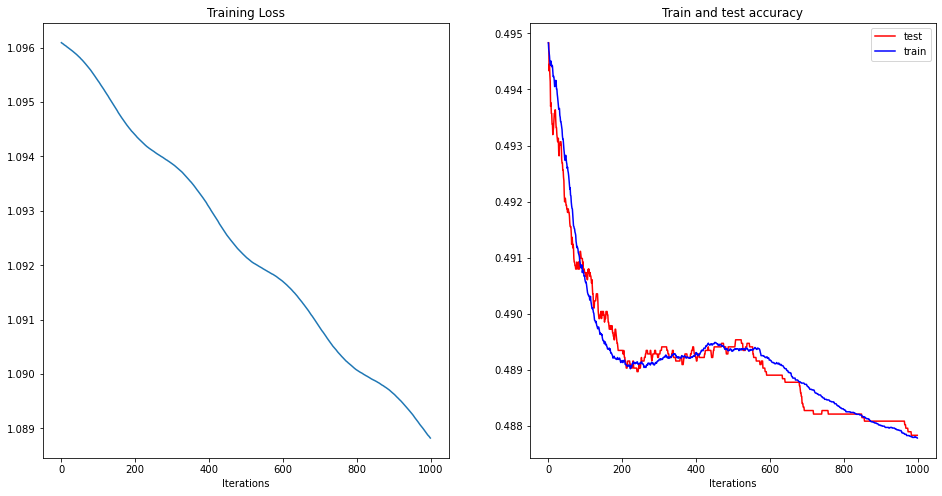

In [23]:
losses = []
tr_acc = []
test_acc = []
pred = []

for epoch in range(1000):
    print(epoch)
    output=model.forward(X_train_torch)
    loss = loss_function(output, y_train_torch)
    optimizer.zero_grad() #required since pytorch accumulates the gradients
    loss.backward() #backpropagation step
    optimizer.step() #update the parameters
    
    #update loss and accuracy
    losses.append(loss.data)
    output_te=model(X_test_torch)
    pred.append(torch.max(output,1)[1])
    tr_acc.append(metrics.f1_score(y_train_torch, torch.max(output,1)[1], average="micro"))
    test_acc.append(metrics.f1_score(y_test_torch, torch.max(output_te,1)[1], average="micro"))
print(torch.max(output,1)[1][1:1000])
print(tr_acc)
print(torch.max(output_te,1)[1][1:1000])
print(test_acc)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.plot(losses)
ax1.set_title("Training Loss")
ax1.set_xlabel("Iterations")
ax2.plot(test_acc, c='r', label='test')
ax2.plot(tr_acc, c='b', label='train')
ax2.set_title("Train and test accuracy")
ax2.set_xlabel("Iterations")
plt.legend()
plt.show()



In [24]:
'''
for i in range (3): 
    print(i)
    process_epoch() # This may take a while. 
plot_loss()'''

'\nfor i in range (3): \n    print(i)\n    process_epoch() # This may take a while. \nplot_loss()'

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV

#metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

#normalisation
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
pd.set_option('display.max_columns', 60)

In [26]:
'''x_train_na = x_train_ok.dropna()
# drop the column trader
data_train_na = data_train.dropna()
print(data_train_na.shape)
y_train_na = data_train_na[['type', 'Trader']]
y_train_na['type'] = np.where((y_train_na['type']=='HFT'), 2, y_train_na['type'])
y_train_na['type'] = np.where((y_train_na['type']=='MIX'), 1, 0)
print(y_train_na.shape)'''
'''X_train_dm = pd.get_dummies(X_train_ok)
Y_train_dm = pd.get_dummies(y_train_ok)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(x_train_dm, y_train_dm, test_size=0.15)
scaler = StandardScaler()
scaler.fit(X_train_rf)
X_train_rf = scaler.transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)'''

'X_train_dm = pd.get_dummies(X_train_ok)\nY_train_dm = pd.get_dummies(y_train_ok)\nX_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(x_train_dm, y_train_dm, test_size=0.15)\nscaler = StandardScaler()\nscaler.fit(X_train_rf)\nX_train_rf = scaler.transform(X_train_rf)\nX_test_rf = scaler.transform(X_test_rf)'

In [27]:
clf=RandomForestClassifier()
clf.fit(X_train_ok,y_train_ok['type'].to_numpy(dtype="long"))

RandomForestClassifier()

In [28]:
#predictions
y_pred=clf.predict(X_test_ok)

In [29]:
print("Accuracy: ", accuracy_score(y_test_ok['type'].to_numpy(dtype="long"), y_pred))
print("Macro f1 score: ", f1_score(y_test_ok['type'].to_numpy(dtype="long"), y_pred, average='macro'))
print("Weighted f1 score: ", f1_score(y_test_ok['type'].to_numpy(dtype="long"), y_pred, average='weighted'))
print("Score : ", metrics.f1_score(y_test_ok['type'].to_numpy(dtype="long"), y_pred, average = "micro"))

Accuracy:  0.9755482732543483
Macro f1 score:  0.9732973459264613
Weighted f1 score:  0.9755637597780289
Score :  0.9755482732543483


In [30]:
import csv

In [31]:
eval_data = pd.read_csv("data/AMF_test_X_uDs0jHH.csv", index_col=0, sep=',')

In [32]:
eval_data_na = eval_data.copy()
# transform isin into int
eval_data_na['Share'] = eval_data_na['Share'].str[5:].astype(int)

# transform day into int
eval_data_na['Day'] = eval_data_na['Day'].str[5:].astype(int)

print(eval_data.head())
eval_data_na = eval_data_na.fillna(eval_data.mean())
eval_data_na.pop('Trader')

          Share      Day    Trader       OTR   OCR  OMR  min_time_two_events  \
Index                                                                          
1      Isin_106  Date_12  Adelaide  1.114754  68.0  NaN             0.000012   
2       Isin_94   Date_2  Adelaide  1.666667   5.0  NaN             0.001970   
3      Isin_106  Date_13  Adelaide  1.088235  37.0  NaN             0.000000   
4      Isin_106   Date_7  Adelaide  2.250000   4.5  NaN             0.000000   
5      Isin_106  Date_20  Adelaide  1.266667  19.0  NaN             0.000026   

       mean_time_two_events  10_p_time_two_events  med_time_two_events  \
Index                                                                    
1                 22.905096              0.000061             0.003870   
2                 67.630572              0.001970             0.005786   
3                 39.506490              0.000000             0.000485   
4                103.378733              0.000000             0.00470

Index
1                Adelaide
2                Adelaide
3                Adelaide
4                Adelaide
5                Adelaide
               ...       
85300    The Magic Mirror
85301    The Magic Mirror
85302    The Magic Mirror
85303    The Magic Mirror
85304    The Magic Mirror
Name: Trader, Length: 85304, dtype: object

In [33]:
scaler.fit(eval_data_na)
eval_data_ok = scaler.transform(eval_data_na)

In [34]:
predictions = clf.predict(eval_data_ok)

In [36]:
with open("ms_predictions.txt", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Trader", "type"])
    for i, p in enumerate(predictions.tolist()):
        writer.writerow([str(eval_data['Trader'].iloc[i]) , str(p)])

In [92]:
traders = []
for i in eval_data['Trader'] : 
    if i not in traders: 
        traders.append(i)
predictions_finales = []
data = pd.read_csv("ms_predictions.txt", index_col=0, sep=',')
for j in traders :
    a = 0
    b = 0
    c = 0
    print(j)
    if data.loc[j]['type'].size == 1:
        if data.loc[j]['type'] == 2 :
            predictions_finales.append("HFT")
        elif data.loc[j]['type'] == 1 :
            predictions_finales.append("MIX")
        else :
            predictions_finales.append("NON HFT")
    else :
        for p in data.loc[j]['type']:
            if p == 2:
                a += 1
            elif p == 1 :
                b += 1
            else :
                c += 1
        print(a)
        print(b)
        print(c)
        d = max(a,b,c)
        if d == a:
            predictions_finales.append("HFT")
        elif d == b:
            predictions_finales.append("MIX")
        else :
            predictions_finales.append("NON HFT")
print(predictions_finales)

Adelaide
0
0
10
Alana
0
0
37
Alcmene
6
3
39
Alice
2093
4
0
Alices Sister
57
47
79
Angel (Experiment 624)
0
0
14
Annette
72
21
6
Armoire
3
116
44
Arthur/Wart
37
2
6
Axe
28
3
1
Baby Red Bird
238
35
16
Backwoods Beagle
1039
358
122
Bacon Beagle
46
130
729
Baileywick
1611
508
1
Bat Queen
12
11
49
Becky
0
0
31
Bent-Tail the Coyote
902
1
2
Big Al
2
3
74
Big Mama
1244
879
1
Bill Green
448
1668
5
Black Bart
24
340
1433
Bobble
1
0
1
Bomber Beagle
10
3
13
Bookseller
281
38
384
Boomer
0
0
4
Bowler Hat Guy
39
10
52
Braddock
Brer Bear
3
8
26
Brudo Avarius
1993
11
6
Bruno the Dog
19
240
1277
Buck Leatherleaf
1910
91
7
Bucky Oryx-Antlerson
Butch the Bulldog
1271
723
3
Butcher Boy
5
177
1477
Dallben
1
0
6
Danny
946
653
57
Dennis Avarius
63
44
123
Digger the Mole
1
294
1629
Dijon the Thief
401
106
12
Don Karnage
2046
5
0
Donald Duck
645
17
60
Doug Dalmatian
15
254
1365
Dr. Delbert Doppler
3
1
25
Dr. Facilier
4
218
419
Dr. Joshua Sweet
86
228
1243
Dr. Teeth
11
10
17
Duchess
1916
6308
228
Duke of Weselto

In [96]:
with open("predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Trader", "type"])
    for i, p in enumerate(predictions_finales):
        writer.writerow([traders[i], str(p)])